In [1]:
# 1. Install the required packages
# On Windows, you just need to execute this cell for once.
try:
    import google.colab
    # IN_COLAB = True
except ImportError:
    # IN_COLAB = False
    %pip install -q git+https://github.com/huggingface/transformers
    %pip install -q git+https://github.com/huggingface/accelerate

%pip install -q git+https://github.com/huggingface/diffusers
%pip install -q gradio ftfy tensorboard
%pip install -q bitsandbytes
%pip install -q xformers --index-url https://download.pytorch.org/whl/cu124
print("Package installation finished.")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.2 MB/s eta 0:00:

In [5]:
# 2. Create folders and download training scripts
import os, shutil

model_dir = "./models"
output_dir = "./output"

# Create the directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
# Delete the 'output' folder and its contents
shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

def download_file(filename, url):
  # fetch train_dreambooth.py if it doesn't exist
  if not os.path.exists(filename):
      !wget "{url}"
  else:
      print(f"{filename} already exists, skipping download.")

download_file("lpw_stable_diffusion.py", "https://raw.githubusercontent.com/jomo0825/MrFuGenerativeAI/main/DiffusionModel/lpw_stable_diffusion.py")

lpw_stable_diffusion.py already exists, skipping download.


In [6]:
# Install ipyfilechooser (if not already installed)
%pip -q install ipyfilechooser

from google.colab import drive
import os
import shutil
from ipyfilechooser import FileChooser
from IPython.display import display
import ipywidgets as widgets

models = [
   "stable-diffusion-v1-5/stable-diffusion-v1-5",
   "Lykon/DreamShaper",
   "digiplay/DarkSushi2.5D_v1",
   "Dreamlike photoreal",
   #"darkstorm2150/Protogen_Infinity_Official_Release",
]

links = [
   "https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/blob/main/v1-5-pruned-emaonly.safetensors",
   "https://huggingface.co/Lykon/DreamShaper/blob/main/DreamShaper_6.2_BakedVae_pruned.safetensors",
   "https://huggingface.co/digiplay/DarkSushi2.5D_v1/blob/main/darkSushi25D25D_v10.safetensors",
   "https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0/blob/main/dreamlike-photoreal-2.0.safetensors",
]

# Mount Google Drive
drive.mount('/content/drive')

# Define source and target directories
source_directory = '/content/drive/MyDrive/Dreambooth'
target_directory = model_dir  # Ensure model_dir is defined

# Create and display the file chooser widget
chooser = FileChooser(source_directory)
chooser.title = '<b>Select a file to transfer:</b>'
display(chooser)

# Define a function to move the selected file
def move_file(file_path):
  global models, links
  if file_path is not None:
      filename = os.path.basename(file_path)
      destination_path = os.path.join(target_directory, filename)
      shutil.copy(file_path, destination_path)
      print(f"Moved {filename} to {target_directory}")
      models.append(filename.split(".")[0])
      links.append(os.path.join(target_directory, filename))
  else:
      print("No file selected.")

# Add a button to trigger the file transfer
transfer_button = widgets.Button(description="Transfer File")
output = widgets.Output()

def on_transfer_clicked(b):
    with output:
        output.clear_output()
        move_file(chooser.selected)

transfer_button.on_click(on_transfer_clicked)
display(transfer_button, output)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileChooser(path='/content/drive/MyDrive/Dreambooth', filename='', title='<b>Select a file to transfer:</b>', …

Button(description='Transfer File', style=ButtonStyle())

Output()

In [7]:
print(models)
print(links[-1])


['stable-diffusion-v1-5/stable-diffusion-v1-5', 'Lykon/DreamShaper', 'digiplay/DarkSushi2.5D_v1', 'Dreamlike photoreal', 'wpg']
./models/wpg.safetensors


In [33]:
from diffusers import StableDiffusionPipeline, AutoencoderKL, UNet2DConditionModel, PNDMScheduler
from transformers import CLIPTextModel, CLIPTokenizer, CLIPFeatureExtractor

from safetensors.torch import load_file
from diffusers.models import AutoencoderKL
import torch
from safetensors.torch import load_file

# Load the safetensors file as a dictionary
state_dict = load_file(links[-1])

pipeline = StableDiffusionPipeline.from_single_file(
    "./models/wpg.safetensors",
    torch_dtype=torch.float16,  # Use float16 for memory efficiency
    use_safetensors=True,       # Explicitly specify you're using safetensors
    local_files_only=True       # Avoid looking for files online
)


# Load your state dictionary from the safetensors file
# state_dict = load_file("models/wpg.safetensors")
# vae = AutoencoderKL.from_single_file(links[-1], subfolder="vae")
# unet = UNet2DConditionModel.from_single_file(links[-1], subfolder="unet")
# text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# pipeline = StableDiffusionPipeline.from_single_file(links[-1])

# Load all required components (example with pretrained models)
# vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")
# text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")
# tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
# unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")
# scheduler = PNDMScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")
# safety_checker = StableDiffusionSafetyChecker.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="safety_checker")
# feature_extractor = CLIPFeatureExtractor.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="feature_extractor")

# Instantiate your custom pipeline
# pipeline = StableDiffusionLongPromptWeightingPipeline(
#     vae=vae,
#     text_encoder=text_encoder,
#     tokenizer=tokenizer,
#     unet=unet,
#     scheduler=scheduler,
#     safety_checker=safety_checker,
#     feature_extractor=feature_extractor,
# )

# Move the pipeline to the GPU if available
pipeline = pipeline.to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing AutoencoderKL: 
 ['encoder.mid_block.attentions.0.to_to_k.bias, encoder.mid_block.attentions.0.to_to_k.weight, encoder.mid_block.attentions.0.to_to_q.bias, encoder.mid_block.attentions.0.to_to_q.weight, encoder.mid_block.attentions.0.to_to_v.bias, encoder.mid_block.attentions.0.to_to_v.weight, decoder.mid_block.attentions.0.to_to_k.bias, decoder.mid_block.attentions.0.to_to_k.weight, decoder.mid_block.attentions.0.to_to_q.bias, decoder.mid_block.attentions.0.to_to_q.weight, decoder.mid_block.attentions.0.to_to_v.bias, decoder.mid_block.attentions.0.to_to_v.weight']


NotImplementedError: Cannot copy out of meta tensor; no data! Please use torch.nn.Module.to_empty() instead of torch.nn.Module.to() when moving module from meta to a different device.

  0%|          | 0/20 [00:00<?, ?it/s]

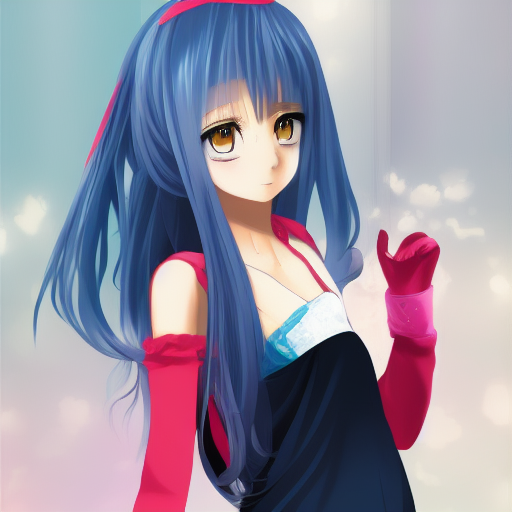

In [28]:
from diffusers import EulerAncestralDiscreteScheduler
import torch
import random
from IPython.display import display

generator = torch.Generator().manual_seed(221)
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

output = pipeline(
        "wpg 1girl, a illustration of anime 1girl",
        negative_prompt="grain",
        height=512,
        width=512,
        num_inference_steps=20,
        guidance_scale=7,
        generator=generator
    )

display(output.images[0])

In [ ]:
import torch
import random
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
from diffusers import DPMSolverMultistepScheduler, EulerDiscreteScheduler,EulerAncestralDiscreteScheduler
from diffusers.pipelines.stable_diffusion import StableDiffusionSafetyChecker
import gradio as gr
from PIL import Image


def load_pipeline(model_name, progress=gr.Progress()):
    progress(0, desc="Loading text2img pipeline...")
    #pipe_txt2img = StableDiffusionPipeline.from_pretrained(
    #    model_name,
    #    torch_dtype=torch.float16,
    #    safety_checker=StableDiffusionSafetyChecker.from_pretrained("CompVis/stable-diffusion-safety-checker"),
    #    use_safetensors=True,
    #).to("cuda")
    pipe_txt2img = StableDiffusionPipeline.from_single_file(
        model_name,
        torch_dtype=torch.float16,
        safety_checker=StableDiffusionSafetyChecker.from_pretrained("CompVis/stable-diffusion-safety-checker"),
        use_safetensors=True
    ).to("cuda")

    pipe_txt2img.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe_txt2img.scheduler.config)

    progress(0.5, desc="Loading img2img pipeline...")
    pipe_img2img = StableDiffusionImg2ImgPipeline(
        vae=pipe_txt2img.vae,
        text_encoder=pipe_txt2img.text_encoder,
        tokenizer=pipe_txt2img.tokenizer,
        unet=pipe_txt2img.unet,
        scheduler=pipe_txt2img.scheduler,
        safety_checker=pipe_txt2img.safety_checker,  # This will get the safety checker from txt2img
        feature_extractor=pipe_txt2img.feature_extractor,  # This will get the feature extractor from txt2img
    ).to("cuda")
    pipe_img2img.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe_img2img.scheduler.config)
    progress(1.0, desc="Done!")
    return pipe_txt2img, pipe_img2img

def txt2img(prompt, negative_prompt, height, width, steps, guidance_scale, seed):
    if seed == -1:
        seed = random.randint(0, 2**32 - 1)
    generator = torch.Generator(device="cuda").manual_seed(seed)
    output = pipe_txt2img(
        prompt,
        negative_prompt=negative_prompt,
        height=height,
        width=width,
        num_inference_steps=steps,
        guidance_scale=guidance_scale,
        generator=generator
    )
    if not output.nsfw_content_detected[0]:
      #print("Not NSFW")
      return output.images[0], "Success"
    else:
      #print("NSFW Detected")
      return output.images[0], "NSFW content detected"

    #if len(output.images) == 0:
    #   return None, "NSFW content detected"
    #return output.images[0], "Success"

def img2img(init_image, prompt, negative_prompt, height, width, strength, steps, guidance_scale, seed):
    if init_image is None:
        return None
    if seed == -1:
        seed = random.randint(0, 2**32 - 1)
    generator = torch.Generator(device="cuda").manual_seed(seed)
    init_image = Image.fromarray(init_image)
    init_image = init_image.resize((width, height), Image.Resampling.NEAREST)
    # Convert pipeline to img2img
    output = pipe_img2img(
        prompt,
        image=init_image,
        negative_prompt=negative_prompt,
        strength=strength,
        num_inference_steps=steps,
        guidance_scale=guidance_scale,
        generator=generator
    )
    if not output.nsfw_content_detected[0]:
      #print("Not NSFW")
      return output.images[0], "Success"
    else:
      #print("NSFW Detected")
      return output.images[0], "NSFW content detected"

with gr.Blocks(css="""
.absolute-top-right {
   position: absolute !important;
   top: 8px;
   right: 8px;
   z-index: 100;
}
.absolute-top-right button {
   min-width: 32px !important;
   height: 32px !important;
   padding: 0 !important;
}
""") as demo:
    with gr.Row():
      model_dropdown = gr.Dropdown(choices=models, value=models[0], label="Model", interactive=True)
      loading_status = gr.Textbox(value="Ready", label="Status", interactive=False)

    # load the initial model
    pipe_txt2img, pipe_img2img = load_pipeline(links[0])

    def on_model_change(model_name):
       index = models.index(model_name)
       global pipe_txt2img, pipe_img2img
       pipe_txt2img, pipe_img2img = load_pipeline(links[index])
       return "Ready"

    model_dropdown.change(
       fn=on_model_change,
       inputs=[model_dropdown],
       outputs=[loading_status],
       queue=False
    )
    with gr.Row():
      txtCustomModel = gr.TextBox(label="Custom Model", placeholder="")
    with gr.Tabs():
        with gr.Tab("Text to Image"):
            with gr.Row():
                with gr.Column():
                    txt2img_prompt = gr.Textbox(label="Prompt", value="a girl in beautiful green valley and blue skies")
                    txt2img_neg_prompt = gr.Textbox(label="Negative Prompt", value="ugly, noise, blank, blurry, mutation, mangled")
                    txt2img_height = gr.Slider(128, 1024, value=512, step=64, label="Height")
                    txt2img_width = gr.Slider(128, 1024, value=512, step=64, label="Width")
                    txt2img_steps = gr.Slider(1, 100, value=20, step=1, label="Steps")
                    txt2img_guidance = gr.Slider(1, 20, value=7.0, step=0.1, label="Guidance Scale")
                    txt2img_seed = gr.Number(value=-1, label="Seed")
                    txt2img_generate = gr.Button("Generate")

                with gr.Column():
                    txt2img_output = gr.Image(label="Output")

            txt2img_generate.click(
                fn=txt2img,
                inputs=[
                    txt2img_prompt,
                    txt2img_neg_prompt,
                    txt2img_height,
                    txt2img_width,
                    txt2img_steps,
                    txt2img_guidance,
                    txt2img_seed
                ],
                outputs=[txt2img_output,loading_status]
            )
            txt2img_generate.interactive = loading_status.value == "Ready"


        with gr.Tab("Image to Image"):
            with gr.Row():
                with gr.Column():
                    img2img_input = gr.Image(label="Input Image", type="numpy")
                    img2img_prompt = gr.Textbox(label="Prompt", value="a girl in beautiful green valley and blue skies")
                    img2img_neg_prompt = gr.Textbox(label="Negative Prompt", value="ugly, noise, blank, blurry, mutation, mangled")
                    img2img_height = gr.Slider(128, 1024, value=512, step=64, label="Height")
                    img2img_width = gr.Slider(128, 1024, value=512, step=64, label="Width")
                    img2img_strength = gr.Slider(0, 1, value=0.75, step=0.01, label="Strength")
                    img2img_steps = gr.Slider(1, 100, value=20, step=1, label="Steps")
                    img2img_guidance = gr.Slider(1, 20, value=7.0, step=0.1, label="Guidance Scale")
                    img2img_seed = gr.Number(value=-1, label="Seed")
                    img2img_generate = gr.Button("Generate")

                with gr.Column():
                    img2img_output = gr.Image(label="Output")
                    with gr.Row(elem_classes="absolute-top-right"):  # Position button
                      load_to_input = gr.Button("⬅️", scale=0)  # Small arrow button

            img2img_generate.click(
                fn=img2img,
                inputs=[
                    img2img_input,
                    img2img_prompt,
                    img2img_neg_prompt,
                    img2img_height,
                    img2img_width,
                    img2img_strength,
                    img2img_steps,
                    img2img_guidance,
                    img2img_seed
                ],
                outputs=[img2img_output,loading_status]
            )
            img2img_generate.interactive = loading_status.value == "Ready"

            load_to_input.click(
              fn=lambda x: x,
              inputs=img2img_output,
              outputs=img2img_input
            )

demo.launch(share=True, debug=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

v1-5-pruned-emaonly.safetensors:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://92d83be50d2d50840f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/20 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://92d83be50d2d50840f.gradio.live


In [ ]:
demo.close()

Closing server running on port: 7860
